In [1]:
import os
import SimpleITK
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage.interpolation import map_coordinates
from scipy.ndimage.filters import gaussian_filter
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [2]:
def elastic_transform(image, alpha, sigma, zratio=0):
    """Elastic deformation of images as described in [Simard2003]_.
    .. [Simard2003] Simard, Steinkraus and Platt, "Best Practices for
       Convolutional Neural Networks applied to Visual Document Analysis", in
       Proc. of the International Conference on Document Analysis and
       Recognition, 2003.
       Based on gist https://gist.github.com/erniejunior/601cdf56d2b424757de5
       
       
    Parameters
    ----------
    image : np.ndarray
        image to be deformed
    alpha : float
        scale of transformation: larger values have more deformation
    sigma : float
        Gaussian window of deformation: smaller values have more localised
        deformation
    zratio : float
        ratio of deformation of axis 2 vs axis 0 and 1. e.g if x and y are
        sampled 10x more than z, zratio = 10
        
    Returns
    -------
    np.ndarray
        deformed image
        
    """

    dx = gaussian_filter((np.random.rand(*image.shape) * 2 - 1), sigma,
                         mode="constant", cval=0) * alpha
    dy = gaussian_filter((np.random.rand(*image.shape) * 2 - 1), sigma,
                         mode="constant", cval=0) * alpha

    if zratio == 0:
        # Image is 2D
        if image.ndim == 2:
            # Single channel: [x,y]
            grid = np.ogrid[0:image.shape[0], 0:image.shape[1]]
            x, y = np.broadcast_arrays(*grid)
            indices = np.reshape(x + dx, (-1, 1)), np.reshape(y + dy, (-1, 1))
        else:
            # Multiple channels: [x, y, num_channels]
            grid = np.ogrid[0:image.shape[0],
                            0:image.shape[1], 0:image.shape[2]]
            x, y, chan = np.broadcast_arrays(*grid)
            indices = np.reshape(x + dx, (-1, 1)), np.reshape(y + dy, (-1, 1)), \
                np.reshape(chan, (-1, 1))
    else:
        # Image is 3D
        if image.ndim == 3:
            # Single channel: [x,y,z]
            grid = np.ogrid[0:image.shape[0],
                            0:image.shape[1], 0:image.shape[2]]
            x, y, z = np.broadcast_arrays(*grid)
            dz = gaussian_filter(
                (np.random.rand(*image.shape) * 2 - 1),
                sigma * zratio, mode="constant",
                cval=0) * alpha * zratio
            indices = np.reshape(x + dx, (-1, 1)), np.reshape(y + dy, (-1, 1)), \
                np.reshape(z + dz, (-1, 1))
        else:
            # Multiple channels: [x, y, z, num_channels]
            grid = np.ogrid[0:image.shape[0], 0:image.shape[1],
                            0:image.shape[2], 0:image.shape[3]]
            x, y, z, chan = np.broadcast_arrays(*grid)
            dz = gaussian_filter(
                (np.random.rand(*image.shape) * 2 - 1),
                sigma * zratio, mode="constant",
                cval=0) * alpha * zratio
            indices = np.reshape(x + dx, (-1, 1)), np.reshape(y + dy, (-1, 1)), \
                np.reshape(z + dz, (-1, 1)), np.reshape(chan, (-1, 1))

    transformed_image = map_coordinates(image, indices, order=1,
                                        mode='reflect').reshape(image.shape)

    return transformed_image

In [3]:
wdir = "/home/mike/Documents/2017_Data_Science/projects/04_DLTK/example_images/"
filenameT1 = wdir + "patient_109/mr_T1/patient_109_mr_T1.mhd"
nda = SimpleITK.GetArrayFromImage(SimpleITK.ReadImage(filenameT1))
nda[::10,:,:] = 4000
nda[:,::20, :] = 4000
nda[:, :,::20] = 4000
# Change axes to get [x,y,z]
nda2 = nda.swapaxes(0,2).swapaxes(0,1) 
print nda.shape
print nda2.shape

(52, 256, 256)
(256, 256, 52)


# 3D Deformation

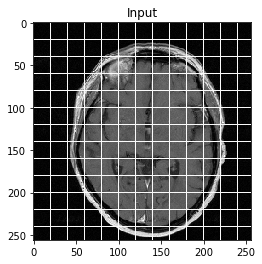

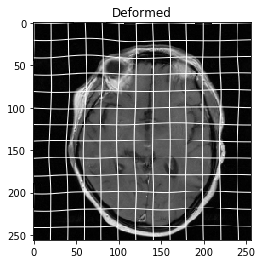

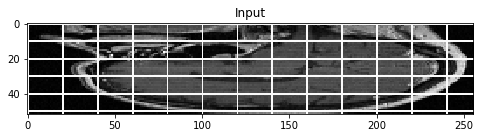

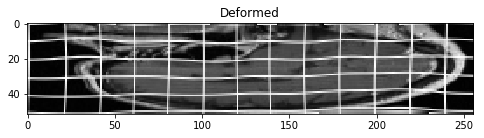

In [4]:
alpha, sigma, zratio = 1000, 20, 0.7
ti = elastic_transform(nda2, alpha, sigma, zratio )
imshow(nda2[:,:,25],interpolation=None)
plt.set_cmap("gray")
plt.title("Input")
plt.show()
imshow(ti[:,:,25],interpolation=None)
plt.title("Deformed")
plt.show()
figure(figsize = (8,4))
imshow(nda2[:, 125,:].T,interpolation=None)
plt.title("Input")
plt.show()
figure(figsize = (8,4))
imshow(ti[:, 125,:].T,interpolation=None)
plt.title("Deformed")
plt.show()

# 2D Deformation

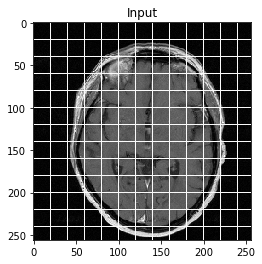

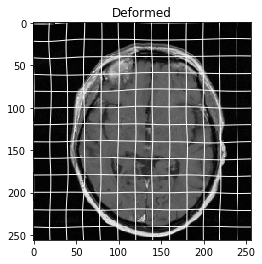

In [5]:
# Use zratio = 0 to define that the data is 2D
alpha, sigma = 100, 20
ti = elastic_transform(nda2[:,:,25], alpha, sigma )
imshow(nda2[:,:,25],interpolation=None)
plt.title("Input")
plt.show()
imshow(ti,interpolation=None)
plt.title("Deformed")
plt.show()